<a href="https://colab.research.google.com/github/FatmaAkacha/Projet-Acad-mique/blob/main/Projet_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1:**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

# Charger les données d'entraînement depuis train_data.npy
train_data = np.load('/content/drive/MyDrive/ProjetIA/train_data.npy')
# Charger les étiquettes d'entraînement depuis train_labels.csv
train_labels = pd.read_csv('/content/drive/MyDrive/ProjetIA/train_labels.csv')

# Charger les données de test depuis test_data.npy
test_data = np.load('/content/drive/MyDrive/ProjetIA/test_data.npy')
# Charger les étiquettes de test depuis test_labels.csv
test_labels = pd.read_csv('/content/drive/MyDrive/ProjetIA/test_labels.csv')

In [ ]:
print(test_labels.head())
print("\n")
print(test_labels.describe())
print("\n")
print(test_labels.info())
print("\3n")

print(train_labels.head())
print("\n")
print(train_labels.describe())
print("\n")
print(train_labels.info())
print(pd.DataFrame(train_data).isnull().sum())
colonne_manquante = train_labels.isnull().sum()
colonne_manquante = colonne_manquante[colonne_manquante > 0]
print(colonne_manquante)
print(pd.DataFrame(test_data).isnull().sum())
colonne_manquante1 = test_labels.isnull().sum()
colonne_manquante1 = colonne_manquante1[colonne_manquante1 > 0]
print(colonne_manquante1)

    9
0   9
1   9
2   9
3   9
4  11


                  9
count  36396.000000
mean      10.376223
std        1.925750
min        0.000000
25%        9.000000
50%       11.000000
75%       11.000000
max       22.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36396 entries, 0 to 36395
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   9       36396 non-null  int64
dtypes: int64(1)
memory usage: 284.5 KB
None
n
   11
0  11
1   9
2  11
3  11
4  11


                  11
count  109188.000000
mean       10.386517
std         1.926153
min         0.000000
25%         9.000000
50%        11.000000
75%        11.000000
max        22.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109188 entries, 0 to 109187
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   11      109188 non-null  int64
dtypes: int64(1)
memory usage: 853.2 KB
None
0      0
1      0
2      0


# **Step 2:**

In [ ]:
nb_col = train_data.shape
print(nb_col)
scaler = MinMaxScaler()
train_data_normalise = scaler.fit_transform(train_data)
print(train_data_normalise[:5])

(109189, 120)
[[9.42927189e-03 2.10564075e-07 2.03746609e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.95694716e-03 1.95694716e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  3.92156863e-03 0.00000000e+00 4.70000000e-01 9.00000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0000000

# **Step 3:**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming train_data_normalise, train_labels are defined

data_train, data_test = train_test_split(train_data_normalise, test_size=0.3, random_state=42)
input_dim = train_data_normalise.shape[1]  # Corrected this line
output_dim = 1

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=input_dim))  # Corrected this line
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=output_dim, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
history = model.fit(data_train, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1911/1911 [==============================] - 7s 3ms/step - loss: 6.0409 - val_loss: 3.7777
Epoch 2/10
1911/1911 [==============================] - 7s 4ms/step - loss: 3.7022 - val_loss: 3.7433
Epoch 3/10
1911/1911 [==============================] - 5s 3ms/step - loss: 3.6986 - val_loss: 3.7437
Epoch 4/10
1911/1911 [==============================] - 7s 4ms/step - loss: 3.7064 - val_loss: 3.7610
Epoch 5/10
1911/1911 [==============================] - 6s 3ms/step - loss: 3.6969 - val_loss: 3.7566
Epoch 6/10
1911/1911 [==============================] - 5s 3ms/step - loss: 3.6948 - val_loss: 3.7418
Epoch 7/10
1911/1911 [==============================] - 7s 4ms/step - loss: 3.7020 - val_loss: 3.7543
Epoch 8/10
1911/1911 [==============================] - 5s 3ms/step - loss: 3.6904 - val_loss: 3.7416
Epoch 9/10
1911/1911 [==============================] - 5s 3ms/step - loss: 3.6911 - val_loss: 3.7294
Epoch 10/10
1911/1911 [==============================] - 7s 4ms/step - loss: 3.691

In [ ]:
max_iterations = 100
acceptable_loss = 0.05
current_iteration = 0
current_loss = float('inf')

while current_loss > acceptable_loss and current_iteration < max_iterations:
    history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

    # Correction: Utilisation de validation_data au lieu de model.evaluate pour évaluer sur les données de test
    loss = history.history['val_loss'][-1]

    current_loss = loss
    current_iteration += 1

    print("Itération", current_iteration, "- Erreur de prédiction :", current_loss)

if current_loss <= acceptable_loss:
    print("L'erreur de prédiction a atteint un niveau acceptable.")
else:
    print("Le nombre d'itérations maximum a été atteint.")


Epoch 1/10
2730/2730 [==============================] - 7s 2ms/step - loss: 3.6678 - val_loss: 3.9951
Epoch 2/10
2730/2730 [==============================] - 10s 4ms/step - loss: 3.6683 - val_loss: 3.9580
Epoch 3/10
2730/2730 [==============================] - 7s 3ms/step - loss: 3.6649 - val_loss: 3.9431
Epoch 4/10
2730/2730 [==============================] - 9s 3ms/step - loss: 3.6657 - val_loss: 3.9411
Epoch 5/10
2730/2730 [==============================] - 7s 3ms/step - loss: 3.6647 - val_loss: 3.9379
Epoch 6/10
2730/2730 [==============================] - 9s 3ms/step - loss: 3.6633 - val_loss: 3.9378
Epoch 7/10
2730/2730 [==============================] - 7s 3ms/step - loss: 3.6632 - val_loss: 3.9289
Epoch 8/10
2730/2730 [==============================] - 9s 3ms/step - loss: 3.6621 - val_loss: 3.9287
Epoch 9/10
2730/2730 [==============================] - 7s 3ms/step - loss: 3.6634 - val_loss: 3.9475
Epoch 10/10
2730/2730 [==============================] - 10s 4ms/step - loss: 3.6

# **Step 4:**

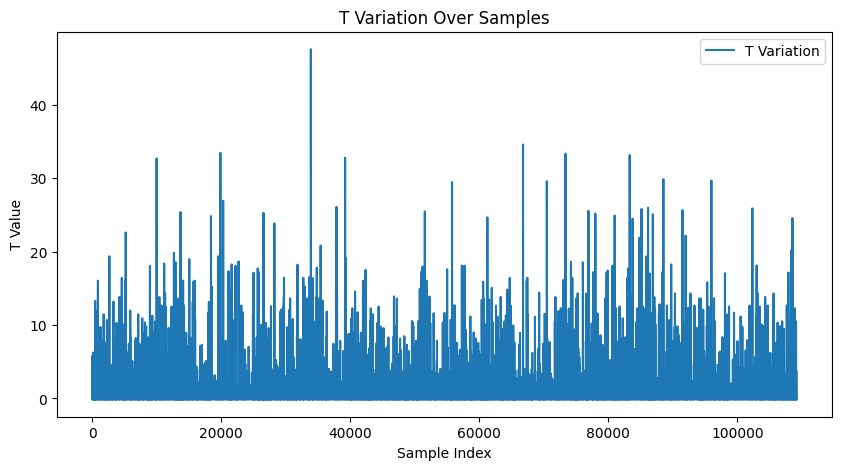

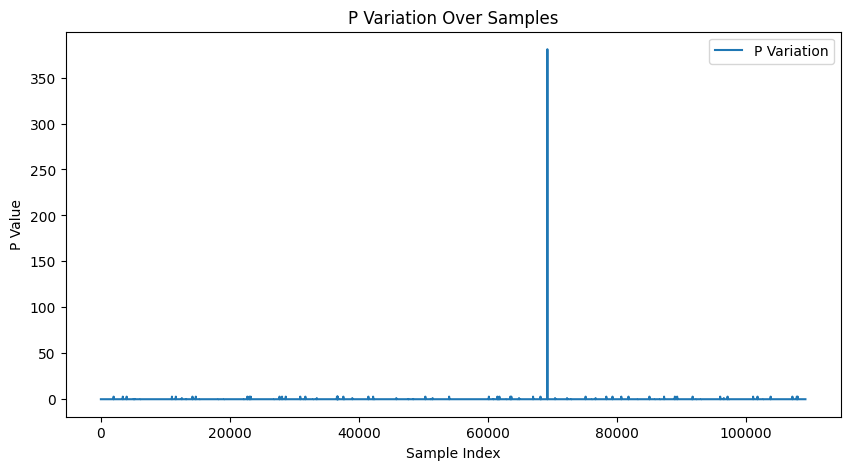

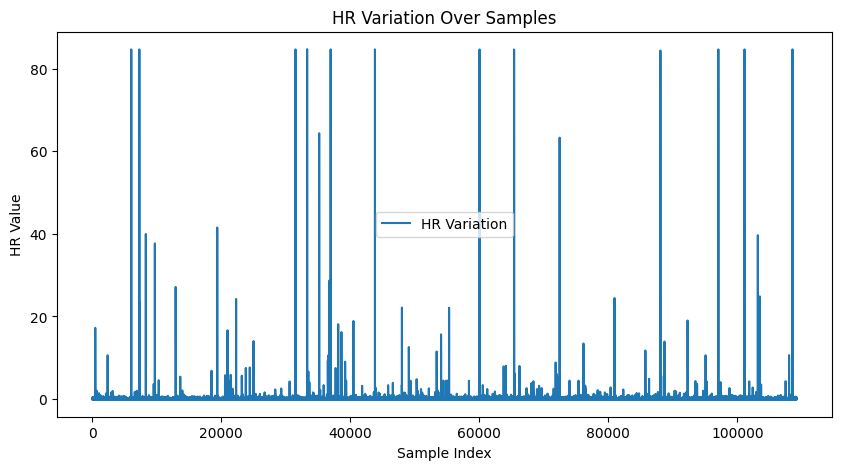

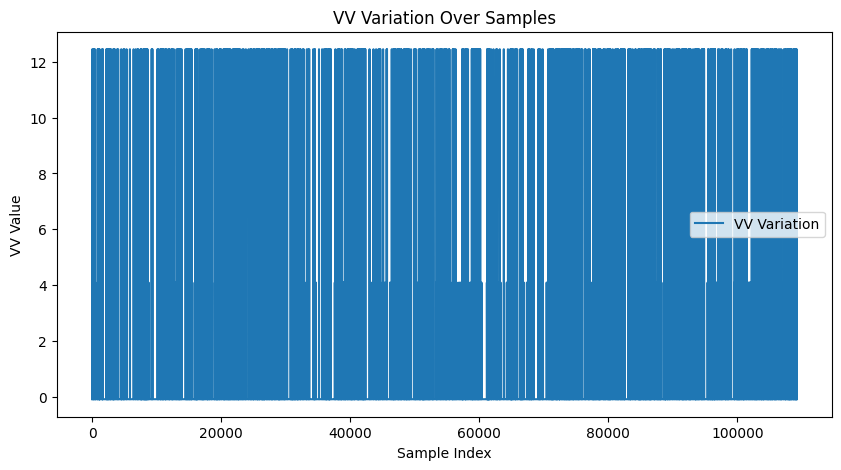

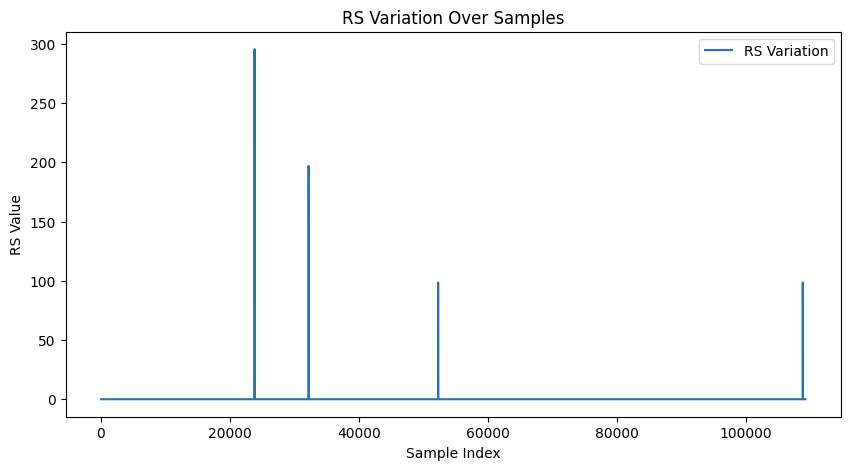

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the names of the input variables (e.g., T, P, HR, VV, RS)
input_variable_names = ['T', 'P', 'HR', 'VV', 'RS']

# Plot the variation curves for each input variable
for i in range(min(train_data.shape[1], len(input_variable_names))):
    plt.figure(figsize=(10, 5))
    plt.plot(train_data[:, i], label=f'{input_variable_names[i]} Variation')
    plt.title(f'{input_variable_names[i]} Variation Over Samples')
    plt.xlabel('Sample Index')
    plt.ylabel(f'{input_variable_names[i]} Value')
    plt.legend()
    plt.show()


# **Step 5:**

In [ ]:
Ev0_pred = [0.5, 0.8, 0.6, 0.7]
Ev0_observed = [0.4, 0.7, 0.9, 0.5]

n = len(Ev0_pred)
rmse = np.sqrt(np.mean((np.array(Ev0_pred) - np.array(Ev0_observed))**2))

print(f"RMSE des paramètres Ev0 prédits : {rmse}")


RMSE des paramètres Ev0 prédits : 0.19364916731037085


# **Step 6:**

Epoch 1/10
2730/2730 [==============================] - 9s 3ms/step - loss: 3.6770 - val_loss: 3.9319
Epoch 2/10
2730/2730 [==============================] - 7s 3ms/step - loss: 3.6753 - val_loss: 3.9539
Epoch 3/10
2730/2730 [==============================] - 11s 4ms/step - loss: 3.6683 - val_loss: 3.9282
Epoch 4/10
2730/2730 [==============================] - 8s 3ms/step - loss: 3.6773 - val_loss: 3.9389
Epoch 5/10
2730/2730 [==============================] - 8s 3ms/step - loss: 3.6722 - val_loss: 3.9730
Epoch 6/10
2730/2730 [==============================] - 8s 3ms/step - loss: 3.6671 - val_loss: 3.9519
Epoch 7/10
2730/2730 [==============================] - 8s 3ms/step - loss: 3.6736 - val_loss: 3.9335
Epoch 8/10
2730/2730 [==============================] - 8s 3ms/step - loss: 3.6717 - val_loss: 3.9300
Epoch 9/10
2730/2730 [==============================] - 8s 3ms/step - loss: 3.6673 - val_loss: 3.9461
Epoch 10/10
1138/1138 [==============================] - 3s 2ms/step


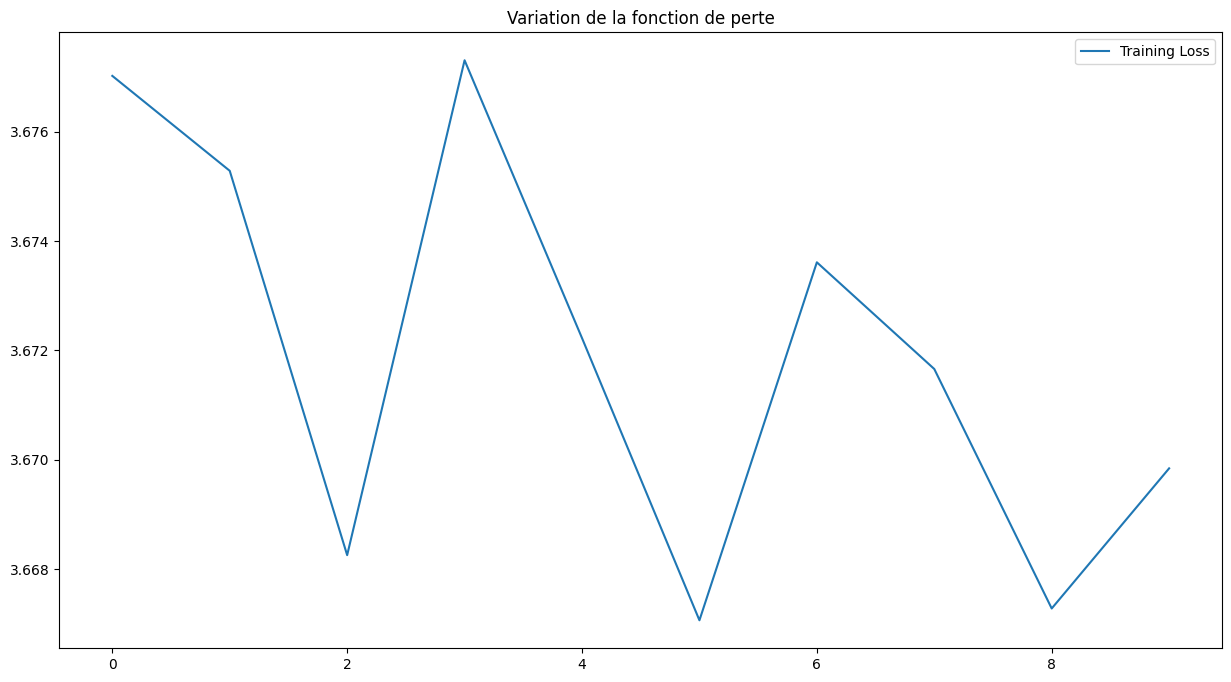

RMSE : 0.19364916731037085


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(15, 8))

# Training the model and collecting history
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Plotting the training loss
plt.plot(history.history['loss'], label='Training Loss')

# Evaluating the model on test data
pred = model.predict(test_data)

plt.title('Variation de la fonction de perte')
plt.legend()
plt.show()

print(f"RMSE : {rmse}")
